# Food for Thought

Welcome to my Unit 4, Unsupervised Learning Capstone. 

What happens when we try to match certain features to an author or group of authors?  Is there a pattern, is everything scatters?  This is what I'm attempting to work through in my project. 

I will be working through 2 different dataframes that I have created via data scrubbing and count vectorizers.  The 2 different dataframes will then be modeled against a list of 10 authors.  These dataframes are:
* Ingredients
* Recipe Name

Christmas Recipe Dataset from Kaggle:  https://www.kaggle.com/gjbroughton/christmas-recipes

This particular dataset contains the details of around 1600 Christmas Recipes that were collected from the BBC Good Food website.  Information in the dataset includes title, description, name of the author, list of ingredients, and the step by step instructions.

My notebook will guide you through data cleaning, count vectorizers, clustering (K Means and Mean Shift), unsupervised feature generation such as PCA, Random Forest Classifiers, and TSNE.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import json
import csv

In [2]:
data= pd.read_json('recipes.json', lines=True)

In [3]:
data.head()

,Author,Description,Ingredients,Method,Name,url
0,Mary Cadogan,Combine a few key Christmas flavours here to m...,"[2 tbsp olive oil, knob butter, 1 onion, finel...",[Heat oven to 190C/fan 170C/gas 5. Heat 1 tbsp...,Christmas pie,https://www.bbcgoodfood.com/recipes/2793/chris...
1,Mary Cadogan,An easy-to-make alternative to traditional Chr...,"[175g butter, chopped, 200g dark muscovado sug...","[Put the butter, sugar, fruit, zests, juice an...",Simmer-&-stir Christmas cake,https://www.bbcgoodfood.com/recipes/1160/simme...
2,Sara Buenfeld,These beautiful and classy little cakes make l...,"[200g dark muscovado sugar, 175g butter, chopp...","[Tip the sugar, butter, dried fruit, whole che...",Christmas cupcakes,https://www.bbcgoodfood.com/recipes/72622/chri...
3,Paul Hollywood,Paul Hollywood's fruit rolls can be made ahead...,"[500g strong white flour, plus extra for dusti...",[Put the flour and 1 tsp salt into a large bow...,Christmas buns,https://www.bbcgoodfood.com/recipes/1803633/ch...
4,Barney Desmazery,"Made these for the second time today, and I ha...","[280g self-raising flour, 175g golden caster s...",[Heat oven to 190C/170 fan/gas 5 and line a 12...,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/981634/chr...


In [4]:
data.to_csv ('recipe.csv', index = None)

In [5]:
recipes = pd.read_csv('recipe.csv')
recipes.head()

,Author,Description,Ingredients,Method,Name,url
0,Mary Cadogan,Combine a few key Christmas flavours here to m...,"['2 tbsp olive oil', 'knob butter', '1 onion, ...",['Heat oven to 190C/fan 170C/gas 5. Heat 1 tbs...,Christmas pie,https://www.bbcgoodfood.com/recipes/2793/chris...
1,Mary Cadogan,An easy-to-make alternative to traditional Chr...,"['175g butter, chopped', '200g dark muscovado ...","['Put the butter, sugar, fruit, zests, juice a...",Simmer-&-stir Christmas cake,https://www.bbcgoodfood.com/recipes/1160/simme...
2,Sara Buenfeld,These beautiful and classy little cakes make l...,"['200g dark muscovado sugar', '175g butter, ch...","['Tip the sugar, butter, dried fruit, whole ch...",Christmas cupcakes,https://www.bbcgoodfood.com/recipes/72622/chri...
3,Paul Hollywood,Paul Hollywood's fruit rolls can be made ahead...,"['500g strong white flour, plus extra for dust...",['Put the flour and 1 tsp salt into a large bo...,Christmas buns,https://www.bbcgoodfood.com/recipes/1803633/ch...
4,Barney Desmazery,"Made these for the second time today, and I ha...","['280g self-raising flour', '175g golden caste...",['Heat oven to 190C/170 fan/gas 5 and line a 1...,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/981634/chr...


In [6]:
recipes.Name.count()

1617

In [7]:
recipes.groupby('Author').count()

,Description,Ingredients,Method,Name,url
Author,,,,,
Aidan McGee,0,1,1,1,1
Ainsley Harriott,1,1,1,1,1
Alex Hely-Hutchinson,1,1,1,1,1
Alex Hollywood,5,5,5,5,5
Angela Nilsen,25,25,25,25,25
BBC Good Food team,4,16,16,16,16
Barney Desmazery,76,90,90,90,90
Ben Tish,2,2,2,2,2
Bill Granger,1,1,1,1,1


In [8]:
recipes.Author.unique

<bound method Series.unique of 0             Mary Cadogan
1             Mary Cadogan
2            Sara Buenfeld
3           Paul Hollywood
4         Barney Desmazery
5                Good Food
6            Caroline Hire
7              Miriam Nice
8                Good Food
9           Katy Greenwood
10        Barney Desmazery
11              Mary Berry
12            James Martin
13               Good Food
14           Lesley Waters
15           Sara Buenfeld
16            James Martin
17           Angela Nilsen
18              Emma Lewis
19           Gordon Ramsay
20             Jane Hornby
21               Good Food
22             Jane Hornby
23           Caroline Hire
24            Tom Kerridge
25          Orlando Murrin
26               Good Food
27              Emma Lewis
28           Sara Buenfeld
29            James Martin
               ...        
1587      Barney Desmazery
1588            Emma Lewis
1589         Sara Buenfeld
1590      Merrilees Parker
1591             Good Fo

In [9]:
recipe_count = recipes.groupby('Author').Description.count()
recipe_count.head()

Author
Aidan McGee              0
Ainsley Harriott         1
Alex Hely-Hutchinson     1
Alex Hollywood           5
Angela Nilsen           25
Name: Description, dtype: int64

We have a lot of authors in this particular dataset. In order to get clustering that makes sense, let's whittle down our data to only show authors who have 23 or more recipes.  This allows us to have a more concentrated data set instead of data that is everywhere.

In [10]:
author_list_greater_than_23 = recipe_count[recipe_count > 23].index.tolist()
author_list_greater_than_23.remove('Good Food')

In [11]:
author_list_greater_than_23

['Angela Nilsen',
 'Barney Desmazery',
 'Cassie Best',
 'James Martin',
 'Jane Hornby',
 'John Torode',
 'Mary Cadogan',
 'Miriam Nice',
 'Sara Buenfeld',
 'Sarah Cook']

In [12]:
len(author_list_greater_than_23)

10

In [13]:
main_recipes = recipes[recipes.Author.isin(author_list_greater_than_23)]
main_recipes

,Author,Description,Ingredients,Method,Name,url
0,Mary Cadogan,Combine a few key Christmas flavours here to m...,"['2 tbsp olive oil', 'knob butter', '1 onion, ...",['Heat oven to 190C/fan 170C/gas 5. Heat 1 tbs...,Christmas pie,https://www.bbcgoodfood.com/recipes/2793/chris...
1,Mary Cadogan,An easy-to-make alternative to traditional Chr...,"['175g butter, chopped', '200g dark muscovado ...","['Put the butter, sugar, fruit, zests, juice a...",Simmer-&-stir Christmas cake,https://www.bbcgoodfood.com/recipes/1160/simme...
2,Sara Buenfeld,These beautiful and classy little cakes make l...,"['200g dark muscovado sugar', '175g butter, ch...","['Tip the sugar, butter, dried fruit, whole ch...",Christmas cupcakes,https://www.bbcgoodfood.com/recipes/72622/chri...
4,Barney Desmazery,"Made these for the second time today, and I ha...","['280g self-raising flour', '175g golden caste...",['Heat oven to 190C/170 fan/gas 5 and line a 1...,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/981634/chr...
7,Miriam Nice,can I made these the day before,"['200g unsalted buttercut into cubes, plus ext...",['Grease and line a 20cm x 20cm brownie tin. H...,Christmas brownies,https://www.bbcgoodfood.com/recipes/christmas-...
10,Barney Desmazery,Prepare ahead and pop in the oven when your gu...,"['50g butter, softened', '4 poussin', '4 rashe...",['Heat oven to 230C/fan 210C/gas 8. Smear the ...,Christmas poussin,https://www.bbcgoodfood.com/recipes/5028/chris...
12,James Martin,25 min prep time? More like an hour.,"['1kg mixed dried fruit(use a mix of raisins, ...","['Put 1kg mixed dried fruit, the zest\xa0and j...",Make & mature Christmas cake,https://www.bbcgoodfood.com/recipes/2607642/ma...
15,Sara Buenfeld,"A fruity pud, served with orange custard cream...","['175g each raisin, currants and sultanas', '1...","['Mix the fruit, almonds, citrus zests and the...",Christmas pudding with citrus & spice,https://www.bbcgoodfood.com/recipes/8370/chris...
16,James Martin,This traditional Christmas cake is the perfect...,"['750g mixed dried fruit', '100g blanched whol...",['Heat oven to 140C/120C fan/gas 1. Line the b...,Fig & honey Christmas cake,https://www.bbcgoodfood.com/recipes/13381/fig-...
17,Angela Nilsen,A long-life Christmas cake that's bursting wit...,"['200g butter, softened to room temperature', ...",['Heat oven to 160C/fan 140C/gas 3. Line the b...,Angela Nilsen's Christmas cake,https://www.bbcgoodfood.com/recipes/1004/angel...


The dataframe has been pared down and we are able to being with more refined data cleaning methods to allow us to work through clustering methods.

### Ingredients and Author Name:  Clustering and Unsupervised Feature Generation

In the following models, I will show you how the features related to recipe ingredients perform in a clustering environment. 

In [14]:
type(main_recipes.Ingredients.iloc[0].strip('][').strip("'").split(', '))

list

In [15]:
' '.join(main_recipes.Ingredients.iloc[0].strip('][').split(', ')).replace("'","")

'2 tbsp olive oil knob butter 1 onion finely chopped 500g sausagemeat or skinned sausages grated zest of 1 lemon 100g fresh white breadcrumbs 85g ready-to-eat dried apricots chopped 50g chestnut canned or vacuum-packed chopped 2 tsp chopped fresh or 1tsp dried thyme 100g cranberries fresh or frozen 500g boneless skinless chicken breasts 500g pack ready-made shortcrust pastry beaten egg to glaze'

In [16]:
main_recipes.head()

,Author,Description,Ingredients,Method,Name,url
0,Mary Cadogan,Combine a few key Christmas flavours here to m...,"['2 tbsp olive oil', 'knob butter', '1 onion, ...",['Heat oven to 190C/fan 170C/gas 5. Heat 1 tbs...,Christmas pie,https://www.bbcgoodfood.com/recipes/2793/chris...
1,Mary Cadogan,An easy-to-make alternative to traditional Chr...,"['175g butter, chopped', '200g dark muscovado ...","['Put the butter, sugar, fruit, zests, juice a...",Simmer-&-stir Christmas cake,https://www.bbcgoodfood.com/recipes/1160/simme...
2,Sara Buenfeld,These beautiful and classy little cakes make l...,"['200g dark muscovado sugar', '175g butter, ch...","['Tip the sugar, butter, dried fruit, whole ch...",Christmas cupcakes,https://www.bbcgoodfood.com/recipes/72622/chri...
4,Barney Desmazery,"Made these for the second time today, and I ha...","['280g self-raising flour', '175g golden caste...",['Heat oven to 190C/170 fan/gas 5 and line a 1...,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/981634/chr...
7,Miriam Nice,can I made these the day before,"['200g unsalted buttercut into cubes, plus ext...",['Grease and line a 20cm x 20cm brownie tin. H...,Christmas brownies,https://www.bbcgoodfood.com/recipes/christmas-...


In [17]:
main_recipes['Ingredient_Combo'] = [' '.join(main_recipes.Ingredients.iloc[i].strip('][').split(', ')).replace("'"," ") for i in range(main_recipes.shape[0])]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Let's get rid of some words that will skew our clusters.  To do this, we will utilize count vectorizers.  This will show us the words that show up most commonly and hlep us determine if we need to remove from the dataframe or not.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [19]:
english_stop_list = ['ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than']
ingredient_stop_list = ['sized','heaped','alternative','bag','flat','jar','colouring','fine','streaky','strong','grating','well','whole','trimmed', 'tub','use','used','16', '30g','roll', 'rolled', 'room','roughly','taste', 'temperature', 'thick', 'thin', 'thinly','24','soft', 'softened','shredded', 'sifted', 'sliced', 'slices', 'small','self', 'separated', 'serve','see','ready','removed','quality', 'quartered','light', 'lightly', 'like','medium', 'melted','made','little','piece', 'pieces', 'pinch', 'plain','peel','picked','mini', 'mixed','pack', 'packs','juiced','left','750g','284ml','cubed', 'cubes','dark','hot', 'ice','1l','golden', 'good', 'grated', 'greasing', 'green', 'ground', 'half', 'halved', 'handful','free','full','cold','cooked','cored','chunks','clear','fresh', 'freshly', 'frozen','extract', 'fat', 'finely', 'flaked', 'food','cut','decorate','deseeded','diced', 'double', 'drained', 'dried', 'dry', 'dusting', 'edible','beaten','broken','375g','10', '125g', '400ml', '600g','kg','g','peeled','optional','100ml', '12', '140g', '150g', '150ml', '175g', '1kg', '1½', '200g', '200ml', '225g', '250g', '250ml', '25g', '300g', '300ml', '350g', '400g', '450g', '500g', '500ml', '50ml', '600ml', '75g', '85g']

In [20]:
master_stop_list = english_stop_list+ingredient_stop_list
master_stop_list

['ourselves',
 'hers',
 'between',
 'yourself',
 'but',
 'again',
 'there',
 'about',
 'once',
 'during',
 'out',
 'very',
 'having',
 'with',
 'they',
 'own',
 'an',
 'be',
 'some',
 'for',
 'do',
 'its',
 'yours',
 'such',
 'into',
 'of',
 'most',
 'itself',
 'other',
 'off',
 'is',
 's',
 'am',
 'or',
 'who',
 'as',
 'from',
 'him',
 'each',
 'the',
 'themselves',
 'until',
 'below',
 'are',
 'we',
 'these',
 'your',
 'his',
 'through',
 'don',
 'nor',
 'me',
 'were',
 'her',
 'more',
 'himself',
 'this',
 'down',
 'should',
 'our',
 'their',
 'while',
 'above',
 'both',
 'up',
 'to',
 'ours',
 'had',
 'she',
 'all',
 'no',
 'when',
 'at',
 'any',
 'before',
 'them',
 'same',
 'and',
 'been',
 'have',
 'in',
 'will',
 'on',
 'does',
 'yourselves',
 'then',
 'that',
 'because',
 'what',
 'over',
 'why',
 'so',
 'can',
 'did',
 'not',
 'now',
 'under',
 'he',
 'you',
 'herself',
 'has',
 'just',
 'where',
 'too',
 'only',
 'myself',
 'which',
 'those',
 'i',
 'after',
 'few',
 'whom',

In [21]:
vectorizer = CountVectorizer(stop_words = master_stop_list, min_df=0.005,max_df=0.25,max_features=200,ngram_range=(1, 2))
X = vectorizer.fit_transform(main_recipes.Ingredient_Combo)
print(vectorizer.get_feature_names())

['100g butter', '100g caster', '50g butter', 'almond', 'almonds', 'apple', 'apples', 'apricot', 'apricot jam', 'apricots', 'bacon', 'baking', 'baking powder', 'bay', 'bay leaves', 'bicarbonate', 'bicarbonate soda', 'black', 'bramley', 'brandy', 'bread', 'breadcrumbs', 'brown', 'brown sugar', 'bunch', 'butter plus', 'butter tbsp', 'butter tsp', 'cake', 'carrots', 'carton', 'caster', 'caster sugar', 'cheese', 'cherries', 'cherry', 'chestnut', 'chicken', 'chicken stock', 'chilli', 'chocolate', 'chocolate chopped', 'chopped 100g', 'chopped large', 'chopped tbsp', 'cider', 'cider vinegar', 'cinnamon', 'cinnamon stick', 'cinnamon tsp', 'clementines', 'clove', 'cloves', 'cloves crushed', 'cocoa', 'coconut', 'coriander', 'cranberries', 'cranberry', 'cream', 'crushed', 'crème', 'crème fraîche', 'egg', 'egg whites', 'eggs', 'flour plus', 'flour tsp', 'fondant', 'fraîche', 'fruit', 'garlic', 'garlic clove', 'garlic cloves', 'ginger', 'ginger tsp', 'glacé', 'goes', 'gold', 'honey', 'icing', 'icing

In [22]:
len(vectorizer.get_feature_names())

200

In [23]:
print(X.todense())

[[0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### K Means

This method is a way to group daya into clusters of similar data points with similar variances.  K Means assumes that the underlying "true" clusters are radially symmetrical.  This means that they are uniform in all directions and the edges curve outward.  K Means also assumes that all clusters have similar variances.  This form of clustering can run more slowly as high-dimensional data tends to bog it down.  In this instance, you can use mini-batch to speed it up.  In the following clusters, you will see K Means and Mini-Batch clustering used.

In [24]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

Let's start with K Means.  We will define the features and the outcome.

In [25]:
ingredients = X.todense()
author = main_recipes['Author'].astype('category').cat.codes

In [26]:
author.head()

0    6
1    6
2    8
4    1
7    7
dtype: int8

In the code below, we will reduce the components to 2 using PCA.  We will also normalize the data.  Then we will calculate the predicted values and plot the solution.

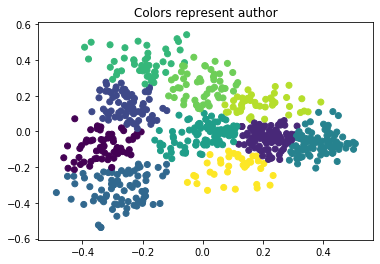

In [27]:
ingredient_model = normalize(ingredients)

ingredient_pca = PCA(2).fit_transform(ingredient_model)

ingredient_pred = KMeans(n_clusters=10, random_state=42).fit_predict(ingredient_pca)

plt.scatter(ingredient_pca[:, 0], ingredient_pca[:, 1], c=ingredient_pred)
plt.title('Colors represent author')
plt.show()

We can use code to determine what our clusters above mean.  Let's try it out.

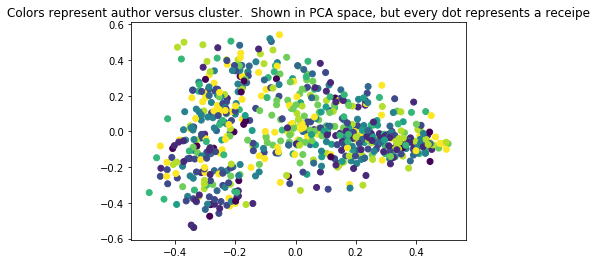

Comparing k-means clusters against the data:
col_0  0   1   2  3   4   5   6   7   8   9
row_0                                      
0      4   9  11  2  12   1   5   4   4  12
1      3  18  14  7   5  10   7   9  15   6
2      3   1  16  2  20   1   6   3   4  19
3      4  13  18  5  11   1   7   5   7   8
4      3  19   5  6  14   2  11   5  19  11
5      0  10   8  8   4   6   3  30  11  19
6      3   3   4  5   9   0   3   2  11   7
7      1   4   4  6   2   2   7  17   3   7
8      2   7   4  3   5   3   6   6   6   4
9      2   6   6  1   5   3   0   2   9   3


In [28]:
plt.scatter(ingredient_pca[:, 0], ingredient_pca[:, 1], c=author)
plt.title('Colors represent author versus cluster.  Shown in PCA space, but every dot represents a receipe')
plt.show()

print('Comparing k-means clusters against the data:')
print(pd.crosstab(ingredient_pred, author))

K Means is not the best model to use when looking at ingredients against multiple cooks.  The clustering, in terms of author, does not seem to be distinctive.  The ingredients are showing up with multiple cooks.  This is to be expected as common ingredients such as eggs and flour, would show up multiple times with multiple cooks.

This is actually a good mix though as some of the rows aren't at 5.

In [29]:
ingredients.shape

(689, 200)

In [30]:
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=10,
    batch_size=689)
minibatchkmeans.fit(ingredient_pca)

predict_mini = minibatchkmeans.predict(ingredient_pca)

print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, ingredient_pred))

Comparing k-means and mini batch k-means solutions:
col_0   0   1   2   3   4   5   6   7   8   9
row_0                                        
0       2   0   0  16   0  17   0   0   0   4
1       0   0  56   0   0   2   0   8   0   0
2       0   0   4   0   0   0  47   9   0   0
3       0  27   0   0   0  80   0   0   4   0
4      24   0   0  14   0   0   0   0   0   0
5       0   0   0  49   0   0   0   0   0   0
6      38   0  15   0   0   0   0   0   0   0
7       0   0   0   0   0   0   0  36  37   0
8       0  50   0   0  95   0   0   0   5   0
9       0  17   0   0   0   0   0   0   0  33


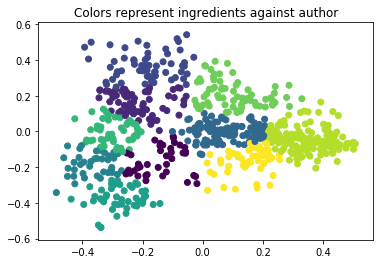

In [31]:
plt.scatter(ingredient_pca[:, 0], ingredient_pca[:, 1], c=predict_mini)
plt.title('Colors represent ingredients against author')
plt.show() 

Now, the graph above is showing some interesting data.  A lot of my rows are showing 0, which is indicative that some separation is happening.

In [32]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

### Mean Shift

Mean Shift is a good clustering method to use if you don't know how many clusters you are looking for.  It's also a good method to use if there is a suspicion that my clusters are heterogenous in size or shape.  It's typically good for a small data set.  

In [33]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(ingredients, quantile=0.2)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(ingredients)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 1


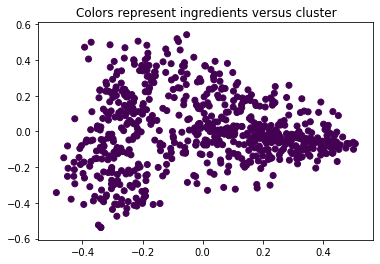

Comparing the assigned categories to the ones in the data:
col_0   0
row_0    
0      25
1      90
2      90
3      45
4      87
5      29
6      55
7      83
8      89
9      96


In [34]:
plt.scatter(ingredient_pca[:, 0], ingredient_pca[:, 1], c=labels)
plt.title('Colors represent ingredients versus cluster')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(author,labels))

Our mean shift cluster is only showing as one cluster.  It looks like common features could be used, but since we are looking at ingredients as they are related to authors, we are seeing a lot of instances where the same ingredients are showing up more commonly than others.  Examples would be that the ingredients of eggs and milk would show up very commonly.  Given that this dataframe is for Christmas recipes, it is likely that there are a lot of recipes that call for baked goods - which require eggs and milk most times.

Mean shift does not make any assumptions about the nature of the data or the number clusters.  This makes it more versatile than K Means.  However, just like K Means, it creates clusters where data points form an n dimensional "globe" around a central point.  This type of cluster is useful for data sets where many clusters are supsected.  

We will now go through the same steps as we did above, but this time we will be looking at a different set of features.

### Recipe Name and Authors:  Clustering and Unsupervised Feature Generation

In the following models, I will show you how the features related to recipe name perform in a clustering environment.  We wil create a new dataframe that contains the recipe name.   

In [35]:
main_name = recipes[recipes.Author.isin(author_list_greater_than_23)]
main_name

,Author,Description,Ingredients,Method,Name,url
0,Mary Cadogan,Combine a few key Christmas flavours here to m...,"['2 tbsp olive oil', 'knob butter', '1 onion, ...",['Heat oven to 190C/fan 170C/gas 5. Heat 1 tbs...,Christmas pie,https://www.bbcgoodfood.com/recipes/2793/chris...
1,Mary Cadogan,An easy-to-make alternative to traditional Chr...,"['175g butter, chopped', '200g dark muscovado ...","['Put the butter, sugar, fruit, zests, juice a...",Simmer-&-stir Christmas cake,https://www.bbcgoodfood.com/recipes/1160/simme...
2,Sara Buenfeld,These beautiful and classy little cakes make l...,"['200g dark muscovado sugar', '175g butter, ch...","['Tip the sugar, butter, dried fruit, whole ch...",Christmas cupcakes,https://www.bbcgoodfood.com/recipes/72622/chri...
4,Barney Desmazery,"Made these for the second time today, and I ha...","['280g self-raising flour', '175g golden caste...",['Heat oven to 190C/170 fan/gas 5 and line a 1...,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/981634/chr...
7,Miriam Nice,can I made these the day before,"['200g unsalted buttercut into cubes, plus ext...",['Grease and line a 20cm x 20cm brownie tin. H...,Christmas brownies,https://www.bbcgoodfood.com/recipes/christmas-...
10,Barney Desmazery,Prepare ahead and pop in the oven when your gu...,"['50g butter, softened', '4 poussin', '4 rashe...",['Heat oven to 230C/fan 210C/gas 8. Smear the ...,Christmas poussin,https://www.bbcgoodfood.com/recipes/5028/chris...
12,James Martin,25 min prep time? More like an hour.,"['1kg mixed dried fruit(use a mix of raisins, ...","['Put 1kg mixed dried fruit, the zest\xa0and j...",Make & mature Christmas cake,https://www.bbcgoodfood.com/recipes/2607642/ma...
15,Sara Buenfeld,"A fruity pud, served with orange custard cream...","['175g each raisin, currants and sultanas', '1...","['Mix the fruit, almonds, citrus zests and the...",Christmas pudding with citrus & spice,https://www.bbcgoodfood.com/recipes/8370/chris...
16,James Martin,This traditional Christmas cake is the perfect...,"['750g mixed dried fruit', '100g blanched whol...",['Heat oven to 140C/120C fan/gas 1. Line the b...,Fig & honey Christmas cake,https://www.bbcgoodfood.com/recipes/13381/fig-...
17,Angela Nilsen,A long-life Christmas cake that's bursting wit...,"['200g butter, softened to room temperature', ...",['Heat oven to 160C/fan 140C/gas 3. Line the b...,Angela Nilsen's Christmas cake,https://www.bbcgoodfood.com/recipes/1004/angel...


In [36]:
main_name.iloc[0].Name

'Christmas pie'

In [37]:
' '.join(main_name.Name.iloc[0].strip('][').split(', ')).replace("'","")

'Christmas pie'

In [38]:
name_stop_list = ['stollen','stuffed','simple','slow','sticky','sweet','quick','roasted','mini','pud','herby','mince','dressing', 'easy','creamy', 'crispy', 'crumble', 'crunchy','choc','classic','blue','braised','bombe','ahead','christmas','baked', 'bauble',]

In [39]:
master_name_stop_list = english_stop_list+name_stop_list
master_name_stop_list

['ourselves',
 'hers',
 'between',
 'yourself',
 'but',
 'again',
 'there',
 'about',
 'once',
 'during',
 'out',
 'very',
 'having',
 'with',
 'they',
 'own',
 'an',
 'be',
 'some',
 'for',
 'do',
 'its',
 'yours',
 'such',
 'into',
 'of',
 'most',
 'itself',
 'other',
 'off',
 'is',
 's',
 'am',
 'or',
 'who',
 'as',
 'from',
 'him',
 'each',
 'the',
 'themselves',
 'until',
 'below',
 'are',
 'we',
 'these',
 'your',
 'his',
 'through',
 'don',
 'nor',
 'me',
 'were',
 'her',
 'more',
 'himself',
 'this',
 'down',
 'should',
 'our',
 'their',
 'while',
 'above',
 'both',
 'up',
 'to',
 'ours',
 'had',
 'she',
 'all',
 'no',
 'when',
 'at',
 'any',
 'before',
 'them',
 'same',
 'and',
 'been',
 'have',
 'in',
 'will',
 'on',
 'does',
 'yourselves',
 'then',
 'that',
 'because',
 'what',
 'over',
 'why',
 'so',
 'can',
 'did',
 'not',
 'now',
 'under',
 'he',
 'you',
 'herself',
 'has',
 'just',
 'where',
 'too',
 'only',
 'myself',
 'which',
 'those',
 'i',
 'after',
 'few',
 'whom',

In [40]:
vectorizer1 = CountVectorizer(stop_words = master_name_stop_list, min_df=0.005,max_df=0.25,max_features=200,ngram_range=(1, 2))
X_name = vectorizer1.fit_transform(main_name.Name)
print(vectorizer1.get_feature_names())

['almond', 'apple', 'apricot', 'baby', 'bacon', 'beef', 'beetroot', 'biscuits', 'bread', 'bread sauce', 'butter', 'buttered', 'butternut', 'cabbage', 'cake', 'cakes', 'caramel', 'carrot', 'carrots', 'cauliflower', 'celeriac', 'cheese', 'cheesecake', 'chestnut', 'chicken', 'chilli', 'chocolate', 'chorizo', 'chutney', 'cinnamon', 'clementine', 'cocktail', 'coconut', 'coffee', 'cooker', 'cranberry', 'cranberry sauce', 'cream', 'crème', 'cupcakes', 'custard', 'date', 'dippers', 'duck', 'eccles', 'fennel', 'festive', 'fig', 'forest', 'fruit', 'fruitcake', 'fudge', 'garlic', 'ginger', 'gingerbread', 'glazed', 'glazed ham', 'goat', 'goat cheese', 'golden', 'gratin', 'gravy', 'ham', 'hazelnut', 'herb', 'honey', 'horseradish', 'hot', 'hot chocolate', 'ice', 'ice cream', 'iced', 'jewelled', 'juniper', 'kit', 'lemon', 'little', 'loaf', 'make', 'mango', 'maple', 'marmalade', 'marzipan', 'meringue', 'mincemeat', 'mulled', 'mulled wine', 'mushroom', 'mustard', 'nut', 'olive', 'onion', 'orange', 'pan

In [41]:
print(X_name.todense())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Now that we have worked through the clustering models and unsupervised feature selection with our ingredient dataset.  Let's walk through the same process using recipe name.

In [42]:
recipe_name = X_name.todense()
author = main_name['Author'].astype('category').cat.codes

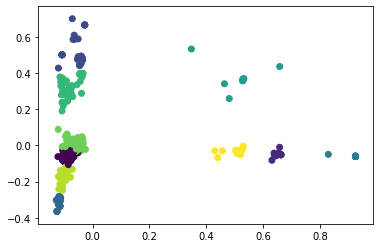

In [43]:
#Reduce components to 2 using PCA
# Normalize the data.
recipe_name_model = normalize(recipe_name)

# Reduce it to two components.
name_pca = PCA(2).fit_transform(recipe_name_model)

# Calculate predicted values.
name_recipe = KMeans(n_clusters=10, random_state=42).fit_predict(name_pca)

# Plot the solution.
plt.scatter(name_pca[:, 0], name_pca[:, 1], c=name_recipe)
plt.show()

If you want to see the names of what my clusters represent, you can use code such as below:

In [44]:
temp = pd.DataFrame(recipe_name,columns=vectorizer1.get_feature_names())
temp['cluster'] = name_recipe

In [45]:
temp.groupby('cluster').mean()

,almond,apple,apricot,baby,bacon,beef,beetroot,biscuits,bread,bread sauce,...,veg,vegan,walnut,white,white chocolate,wild,wine,winter,wrapped,wreath
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.043243,0.005405,0.000000,0.037838,0.016216,0.027027,0.000000,0.000000,0.000000,...,0.016216,0.000000,0.005405,0.000000,0.000000,0.016216,0.059459,0.032432,0.005405,0.000000
1,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150000
2,0.000000,0.000000,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.096774,0.096774,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.125000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.028571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.028571,0.028571,0.000000,0.000000,0.000000,0.000000,0.028571
7,0.016393,0.022951,0.006557,0.013115,0.003279,0.003279,0.000000,0.013115,0.032787,0.013115,...,0.003279,0.006557,0.006557,0.006557,0.000000,0.003279,0.003279,0.003279,0.000000,0.016393
8,0.000000,0.022222,0.022222,0.000000,0.044444,0.022222,0.088889,0.000000,0.000000,0.000000,...,0.000000,0.044444,0.022222,0.000000,0.000000,0.022222,0.044444,0.000000,0.044444,0.000000


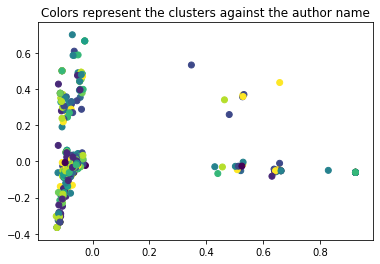

Comparing k-means clusters against the data:
col_0   0   1   2   3   4   5   6   7   8   9
row_0                                        
0       4  28  19  14  21  12  22  17  29  19
1       2   2   3   1   6   0   1   0   0   5
2       1   2   2   1   6   1   6   5   3   4
3       1   6   4   0   3   0   1   0   5   2
4       2   0   3   0   9   0   2   0   1   7
5       0   0   4   0   0   0   0   0   1   3
6       0   2   8   4   5   2   3   2   6   3
7      12  39  43  20  30  11  15  55  33  47
8       2  11   1   4   2   3   4   4  10   4
9       1   0   3   1   5   0   1   0   1   2


In [46]:
# Plot the solution.
plt.scatter(name_pca[:, 0], name_pca[:, 1], c=author)
plt.title('Colors represent the clusters against the author name')
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(name_recipe, author))

In the above model, there are some groups that are separated, but there is generally overlap within the clusters and by author. We do have areas where there is separation which shows that recipe name could be more of a unique indicator for some groups than what we saw with the ingredients.  However, we still get mixed groupings when we color by author. 

What happens if we take the recipe name features and use mini batch?  

Our mini batch will be made up of 689 data points.  This is the number of data points that exist in the recipe_name dataframe.

In [47]:
recipe_name.shape

(689, 168)

In [48]:
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=10,
    batch_size=689)
minibatchkmeans.fit(name_pca)

predict_mini = minibatchkmeans.predict(name_pca)

print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, name_recipe))

Comparing k-means and mini batch k-means solutions:
col_0   0   1   2   3   4  5   6    7   8   9
row_0                                        
0      29   0   0   0   0  0   0   26   0   0
1      59   0   0   0   0  0   0   69   0   0
2       0   0  31   0   0  1  33    0   0   0
3       0   0   0   0   0  0   0  168   0   0
4       0   0   0  22   0  0   0    0   0   0
5       0   0   0   0  24  0   0    0   0   0
6       0   0   0   0   0  0   0    0  43   0
7       0  20   0   0   0  7   0    0   0  14
8       0   0   0   0   0  0   2   42   0   0
9      97   0   0   0   0  0   0    0   2   0


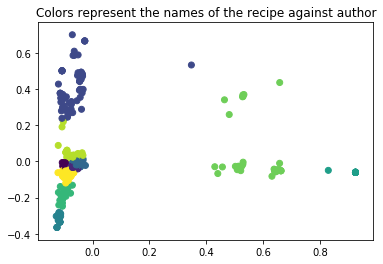

In [49]:
plt.scatter(name_pca[:, 0], name_pca[:, 1], c=predict_mini)
plt.title('Colors represent the names of the recipe against author')
plt.show()


In [50]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth_1 = estimate_bandwidth(recipe_name, quantile=0.2, n_samples=689)

ms_1 = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_1.fit(recipe_name)

labels_name = ms.labels_

cluster_centers_1 = ms.cluster_centers_

n_clusters_1 = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 1


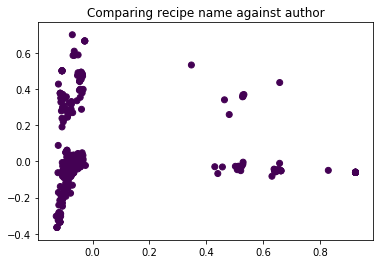

Comparing the assigned categories to the ones in the data:
col_0   0
row_0    
0      25
1      90
2      90
3      45
4      87
5      29
6      55
7      83
8      89
9      96


In [51]:
plt.scatter(name_pca[:, 0], name_pca[:, 1], c=labels_name)
plt.title('Comparing recipe name against author')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(author,labels_name))

What we learn from the mean shift above is that there is no distinction between the groups.  This determination is made because the color is the same.

### Random Forest Classifiers

We have worked through k means, mean shifts, and mini batch.  What happens if we run our dataframe through random forest classifiers?  We are using classifiers as we have explored different unsupervised techinques and have seen that we are not seeing the distinction of authors.  Would we get different results if we employed a supervised approach to try to predict the author using the same features as above.

In [52]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

1.  Random Forest Classifier on Ingredients

In [53]:
radm = RandomForestClassifier(class_weight = 'balanced')
cross_val_score(radm, ingredients, author, cv=5)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: T

array([0.26428571, 0.28057554, 0.23913043, 0.22627737, 0.19259259])

In [54]:
Xtrain, Xtest, ytrain, ytest = train_test_split(ingredients, author, test_size=0.20)

In [55]:
#do test train split
radm.fit(Xtrain,ytrain)
#fit on train set, but do confusion matrix on test set

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
ingredient_matrix = confusion_matrix(radm.predict(Xtest),ytest)
ingredient_matrix

array([[0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 5, 4, 2, 3, 3, 2, 3, 4, 5],
       [2, 0, 8, 0, 0, 1, 1, 2, 1, 3],
       [0, 1, 0, 0, 1, 2, 0, 1, 1, 1],
       [0, 1, 1, 1, 2, 0, 2, 0, 2, 2],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 2, 3, 2, 0, 0, 2, 1, 1],
       [0, 1, 3, 1, 0, 1, 0, 9, 1, 5],
       [1, 2, 0, 1, 4, 1, 3, 0, 2, 2],
       [0, 0, 3, 1, 5, 0, 3, 1, 0, 5]])

In [58]:
pd.DataFrame(ingredient_matrix).divide(ingredient_matrix.sum(axis=1),0)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000
1,0.000000,0.161290,0.129032,0.064516,0.096774,0.096774,0.064516,0.096774,0.129032,0.161290
2,0.111111,0.000000,0.444444,0.000000,0.000000,0.055556,0.055556,0.111111,0.055556,0.166667
3,0.000000,0.142857,0.000000,0.000000,0.142857,0.285714,0.000000,0.142857,0.142857,0.142857
4,0.000000,0.090909,0.090909,0.090909,0.181818,0.000000,0.181818,0.000000,0.181818,0.181818
5,0.000000,0.500000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.083333,0.166667,0.250000,0.166667,0.000000,0.000000,0.166667,0.083333,0.083333
7,0.000000,0.047619,0.142857,0.047619,0.000000,0.047619,0.000000,0.428571,0.047619,0.238095
8,0.062500,0.125000,0.000000,0.062500,0.250000,0.062500,0.187500,0.000000,0.125000,0.125000
9,0.000000,0.000000,0.166667,0.055556,0.277778,0.000000,0.166667,0.055556,0.000000,0.277778


In [59]:
ingredient_matrix.sum(axis=1)

array([ 2, 31, 18,  7, 11,  2, 12, 21, 16, 18])

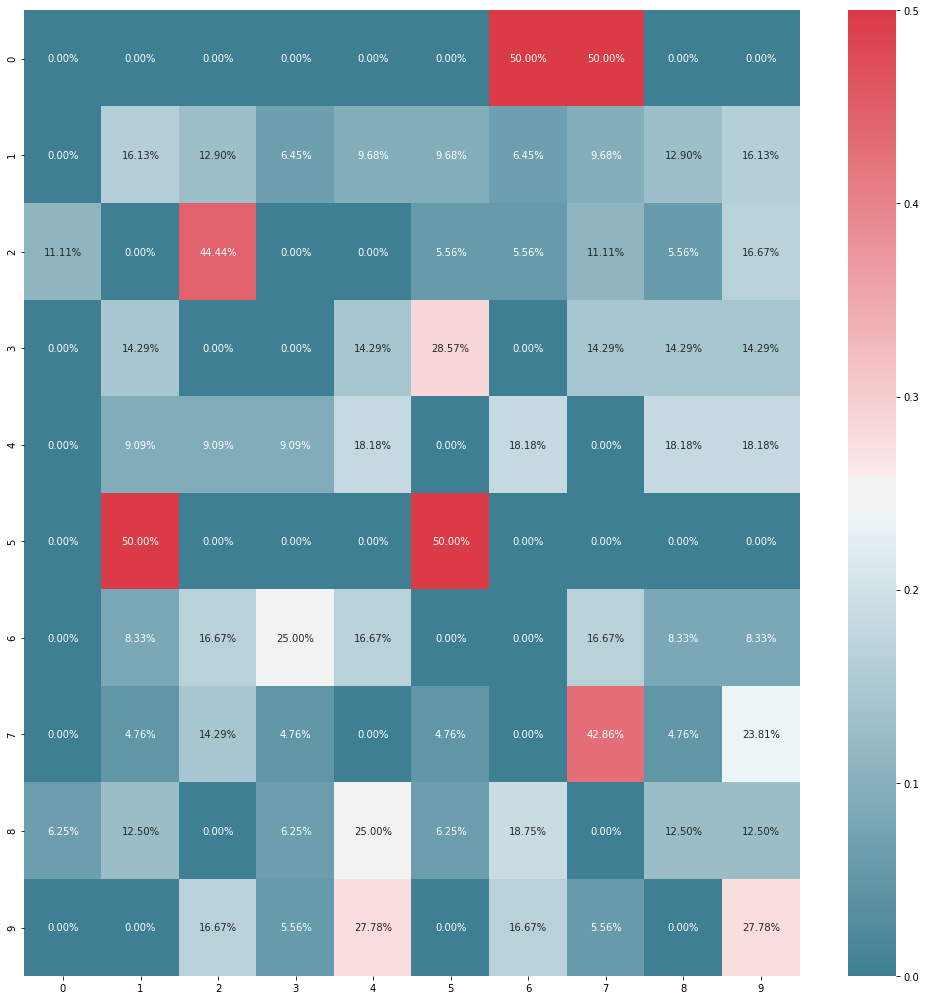

In [60]:
import seaborn as sns
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(pd.DataFrame(ingredient_matrix).divide(ingredient_matrix.sum(axis=1),0), annot=True, 
            fmt='.2%', cmap=colormap)
plt.tight_layout()

In the confusion matrix above, we see that there is some solid prediction happening.  For example, in row 3, we see that author 3 is being predicted 33% of the time, and then hardly at all for the other columns.  Row 9 is another good example as most of the prediction (53%) is shown for author 9 (column 9).  It shows that we are getting the author right more times, but when it misclassifies, it misclassifies as 1 or 0.  As a rule of thumb, anything greater than 10% is some signal.  It is helping to narrow down the author it thinks made that recipe.

2.  Random Forest Classifier on Recipe Name

In [61]:
radm_1 = RandomForestClassifier(class_weight = 'balanced')
cross_val_score(radm_1, recipe_name, author, cv=5)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: T

array([0.22857143, 0.18705036, 0.21014493, 0.17518248, 0.12592593])

In [62]:
Xtrain, Xtest, ytrain, ytest = train_test_split(recipe_name, author, test_size=0.20)

In [63]:
radm.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [64]:
recipe_name_matrix = confusion_matrix(radm.predict(Xtest),ytest)
recipe_name_matrix

array([[ 0,  0,  2,  0,  2,  0,  0,  0,  0,  1],
       [ 0,  2,  3,  1,  1,  1,  2,  1,  3,  0],
       [ 1,  5,  0,  0,  3,  0,  2,  1,  3,  4],
       [ 1,  4,  2,  1,  2,  1,  1,  3,  2,  1],
       [ 0,  2,  1,  2,  7,  0,  0,  0,  1,  2],
       [ 0,  1,  2,  0,  1,  0,  1,  1,  1,  1],
       [ 0,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 2,  2,  1,  0,  3,  0,  1, 11,  4,  3],
       [ 0,  5,  1,  2,  2,  0,  3,  1,  1,  0],
       [ 0,  0,  0,  1,  1,  0,  1,  0,  1,  4]])

In [65]:
pd.DataFrame(recipe_name_matrix).divide(recipe_name_matrix.sum(axis=1),0)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.400000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.200000
1,0.000000,0.142857,0.214286,0.071429,0.071429,0.071429,0.142857,0.071429,0.214286,0.000000
2,0.052632,0.263158,0.000000,0.000000,0.157895,0.000000,0.105263,0.052632,0.157895,0.210526
3,0.055556,0.222222,0.111111,0.055556,0.111111,0.055556,0.055556,0.166667,0.111111,0.055556
4,0.000000,0.133333,0.066667,0.133333,0.466667,0.000000,0.000000,0.000000,0.066667,0.133333
5,0.000000,0.125000,0.250000,0.000000,0.125000,0.000000,0.125000,0.125000,0.125000,0.125000
6,0.000000,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
7,0.074074,0.074074,0.037037,0.000000,0.111111,0.000000,0.037037,0.407407,0.148148,0.111111
8,0.000000,0.333333,0.066667,0.133333,0.133333,0.000000,0.200000,0.066667,0.066667,0.000000
9,0.000000,0.000000,0.000000,0.125000,0.125000,0.000000,0.125000,0.000000,0.125000,0.500000


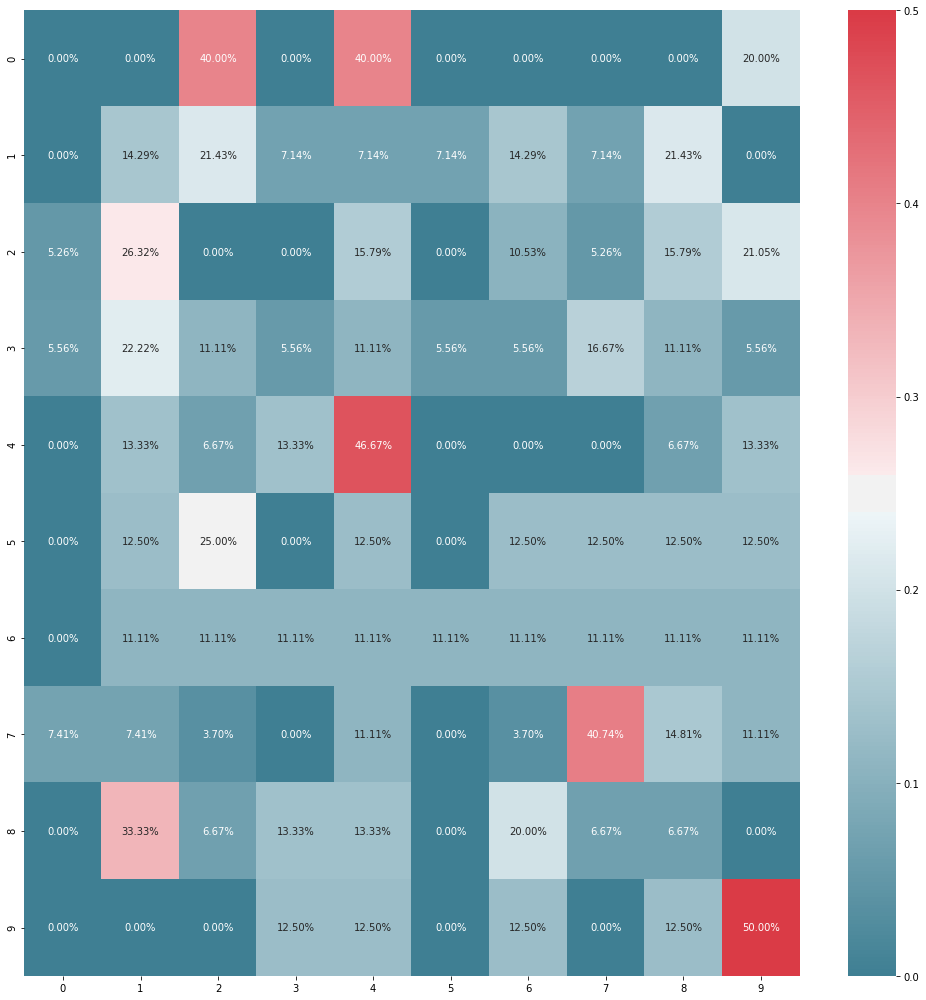

In [66]:
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(pd.DataFrame(recipe_name_matrix).divide(recipe_name_matrix.sum(axis=1),0), annot=True, 
            fmt='.2%', cmap=colormap)
plt.tight_layout()

In regards to our cross validation score, and assuming that 10 is our baseline, we see that the random forest classifier of ingredients against author presents better outputs than recipe name against author.  Our scores in the random forest classifier are a little closer together, while still showing results over the baseline of 10.  Our confusion matrix actually shows better results when looking at recipe names against author.  In the confusion matrix above, the higher numbers are happening outside of the diagonal.  In this instance this is not a helpful predictor.

Let's look at another method of clustering.  Let's employ TSNE against our 2 dataframes:
1.  Ingredients against Author
2.  Recipe name against Author

### TSNE

1.  TSNE on Ingredients against Author

In [67]:
from sklearn.manifold import TSNE

In [68]:
type(np.array(ingredients))

numpy.ndarray

In [69]:
test = TSNE(n_components=2)
#test.fit_transform(np.array(X1))
test2 = test.fit_transform(np.array(ingredients))
test2.shape

(689, 2)

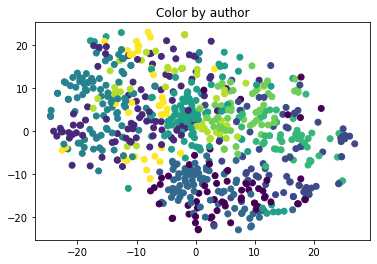

In [70]:
plt.scatter(test2[:, 0], test2[:, 1], c=ingredient_pred)
plt.title('Color by author')
plt.show()

2.  TSNE on Recipe Ingredients against Recipe Name

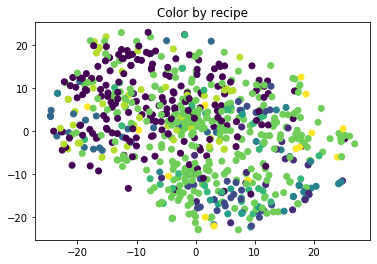

In [71]:
plt.scatter(test2[:, 0], test2[:, 1], c=name_recipe)
plt.title('Color by recipe')
plt.show()

TSNE is interesting as it does not construct explicit mappings related to high dimensional and low dimensional spaces.  TSNE captures structure of data in the sense that neighboring points in input spaces will tend to be neighbors in the low dimensional paces.  

The TSNE models above are showing groupings in the datasets that we did not see with the original clustering views.  In the examples above, the TSNE model by author is showing information that there is distinctive authors.  We see vivid clusters of blues indicating distinctive authors.  For clustering to be successful, we don't actually want to see them all in a same cluster - we want to be able to see separations.  This is indicative that there is differences in the data.

We have been able to see some interesting clusters with the methods above.  Let's try one more method.  For this, we will use the Tfid Vectorizer code.

### Tfid Vectorizer

Recipe Name against Author

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
vectorizer_1 = TfidfVectorizer(stop_words = master_name_stop_list, min_df=0.005,max_df=0.25,max_features=200,ngram_range=(1, 2))
response = vectorizer_1.fit_transform(main_name.Name)
print(vectorizer_1.get_feature_names())

['almond', 'apple', 'apricot', 'baby', 'bacon', 'beef', 'beetroot', 'biscuits', 'bread', 'bread sauce', 'butter', 'buttered', 'butternut', 'cabbage', 'cake', 'cakes', 'caramel', 'carrot', 'carrots', 'cauliflower', 'celeriac', 'cheese', 'cheesecake', 'chestnut', 'chicken', 'chilli', 'chocolate', 'chorizo', 'chutney', 'cinnamon', 'clementine', 'cocktail', 'coconut', 'coffee', 'cooker', 'cranberry', 'cranberry sauce', 'cream', 'crème', 'cupcakes', 'custard', 'date', 'dippers', 'duck', 'eccles', 'fennel', 'festive', 'fig', 'forest', 'fruit', 'fruitcake', 'fudge', 'garlic', 'ginger', 'gingerbread', 'glazed', 'glazed ham', 'goat', 'goat cheese', 'golden', 'gratin', 'gravy', 'ham', 'hazelnut', 'herb', 'honey', 'horseradish', 'hot', 'hot chocolate', 'ice', 'ice cream', 'iced', 'jewelled', 'juniper', 'kit', 'lemon', 'little', 'loaf', 'make', 'mango', 'maple', 'marmalade', 'marzipan', 'meringue', 'mincemeat', 'mulled', 'mulled wine', 'mushroom', 'mustard', 'nut', 'olive', 'onion', 'orange', 'pan

In [74]:
print(response.todense())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [75]:
X4 = response.todense()
author = main_name['Author'].astype('category').cat.codes

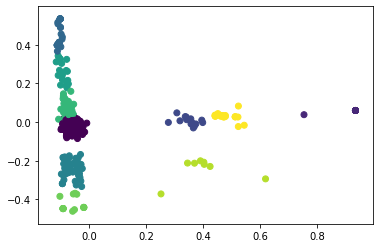

Comparing k-means clusters against the data:
col_0   0   1   2   3   4   5   6   7   8   9
row_0                                        
0      15  54  56  28  42  18  30  71  54  61
1       2   0   3   0   9   0   2   0   1   7
2       1   0   3   1   5   0   1   0   1   2
3       1   5   3   3   1   0   3   3   6   3
4       1   3   9   4   8   2   4   6   7   6
5       0   9   2   1   3   1   2   1   4   0
6       3  16   6   6  10   7   7   1  13   8
7       0   1   1   1   3   1   5   1   2   1
8       0   0   4   0   0   0   0   0   1   3
9       2   2   3   1   6   0   1   0   0   5


In [76]:
X_norm_3 = normalize(X4)

# Reduce it to two components.
X_pca_3 = PCA(2).fit_transform(X_norm_3)

# Calculate predicted values.
y_pred_3 = KMeans(n_clusters=10, random_state=42).fit_predict(X_pca_3)

# Plot the solution.
plt.scatter(X_pca_3[:, 0], X_pca_3[:, 1], c=y_pred_3)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred_3, author))

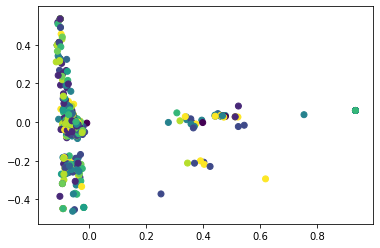

In [77]:
plt.scatter(X_pca_3[:, 0], X_pca_3[:, 1], c=author)
plt.show()

Interesting.  Using the Tfid Vectorizer against the Recipe Name and Author dataset, has yielded different clustering than when we ran it the first time.  You can see above that we have more consistent groupings of clusters, with a couple of outliers.

In [78]:
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=10,
    batch_size=689)
minibatchkmeans.fit(X_pca_3)

predict_mini = minibatchkmeans.predict(X_pca_3)

print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred_3))

Comparing k-means and mini batch k-means solutions:
col_0    0   1   2   3   4   5   6   7  8   9
row_0                                        
0        0   0   0  28   0   9   0   0  0   0
1        0  24   0   0   0   0   0   0  0   0
2      105   0   0   0   0   0   0   0  0   0
3       65   0   0   0   1   0   0   0  0   0
4        0   0   0   0   0  14  13   0  0   0
5       76   0   0   0   0   0   1   0  0   0
6        0   0  14   0   0   0   0   0  7  20
7        0   0   0   0  49   0   0  16  1   0
8       25   0   0   0   0   0  63   0  0   0
9      158   0   0   0   0   0   0   0  0   0


In [79]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth_3 = estimate_bandwidth(X4, quantile=0.2, n_samples=689)

ms_3 = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_3.fit(X4)

labels_3 = ms.labels_

cluster_centers_3 = ms.cluster_centers_

n_clusters_3 = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 1


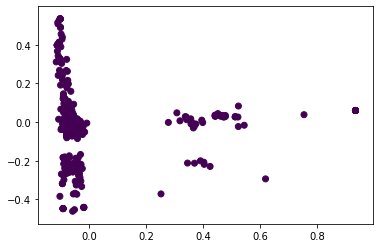

Comparing the assigned categories to the ones in the data:
col_0   0
row_0    
0      25
1      90
2      90
3      45
4      87
5      29
6      55
7      83
8      89
9      96


In [80]:
plt.scatter(X_pca_3[:, 0], X_pca_3[:, 1], c=labels_3)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(author,labels_3))

In [81]:
radm_3 = RandomForestClassifier()
cross_val_score(radm_3, X4, author, cv=5)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: T

array([0.19285714, 0.22302158, 0.1884058 , 0.23357664, 0.12592593])

Using the Tfid Vectorizer as opposed to the Count Vectorizer, and then running through all the clustering methods, actually yields better results.  Not only are we seeing more consistent groupings, but the random forest classifier is showing better results as well.  This was done agains the Recipe Name and Author dataset.

### Summary

My data started with a lot of information.  We had over 1600 recipes attributed to a variety of authors.  We also had features that were very redundant and had to be scrubbed out.  Having a large data set does tend to make clustering attempts difficult as there are too many data points to try to group together.  This can result in clusters of data with no correlation.

Based on the different clusting methods and unsupervised feature generation scenarios, I have determined that mini batch clustering recipe name against author provides the most useful information.  There is enough similarity and differences to show groupings of recipe names against my authors.  In the mini batch clustering, even though it is grouping by specific authors, we are seeing some separation happening which shows that the clusters are working.  In the clustering of ingredients against author name, there is no separation and it's just clustering individual authors and ingredients.  Trying to cluster recipe ingredients against author yielded some clustering, but there are too many overlaps.  There is greater likelihood of a recipe ingredient showing in multiple authors, then the name of the recipe.

Count vectorizers are useful in stripping out redundant features; however, I have found that using the Tfid Vectorizer yieled better results (not only in clustering, but with the random forest classifier as well).

### Conclusion

As I am learning and starting to pick up on patterns, I am starting to see that having too much data can be a bad thing.  Well, let me rephrase that - having too much data that has not been cleaned up can be a bad thing.  From my Unsupervised Learning Capstone, I have learned the following:

* Reduce features - take care to reduce duplication where possible
* Reduce data size where applicable - we want to make sure that our data sample set is manageable, but provides enough diversity so that we can see interesting patterns
* When clustering, playing with different parameters can show interesting patterns in the data

I went into this project thinking that having actual groupings of clusters was a good thing; however, have learned that what you want to see is clusters that are not grouped with other clusters.  This lets us know that there is separation and that there are distances.  